<a href="https://colab.research.google.com/github/kgoldra/capstone_Xplisit/blob/main/main22_but_bad_prediction_acc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import zipfile
import random
import tensorflow as tf
import shutil
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
from shutil import copyfile
from os import getcwd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import numpy as np
from sklearn.utils import class_weight
from google.colab import files
from keras.models import load_model



In [ ]:
try:
  shutil.rmtree('/content/Data')
  hutil.rmtree('/content/nail diseases')
except:
  pass

In [ ]:
path_nails = f"/content/nail diseases.zip"

local_zip = path_nails
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/')
zip_ref.close()

In [ ]:
ORIGINDIR = "/content/nail diseases"
DATADIR = "/content/Data"
TRAINORTEST = ["training", "testing"]
CATEGORIES = ["aloperia areata", 
              "beau's lines", 
              "bluish nail", 
              "clubbing", 
              "darier's disease", 
              "eczema", 
              "koilonychia", 
              "leukonychia", 
              "lindsay's nails", 
              "muehrck-e's lines", 
              "normal", 
              "onycholycis", 
              "pale nail", 
              "red lunula", 
              "splinter hemmorrage", 
              "terry's nail", 
              "white nail", 
              "yellow nails"]

In [ ]:
counter = 0

for trainortest in TRAINORTEST:
  path = os.path.join(DATADIR, trainortest)
  for category in CATEGORIES:
    counter += 1
    originpath = os.path.join(ORIGINDIR, category)
    path2 = os.path.join(path, category)
    if(counter) <= 18:
      print(category, "Datasets Has: ", len(os.listdir(originpath)) ,"Data")
    os.makedirs(path2)
    pass

aloperia areata Datasets Has:  47 Data
beau's lines Datasets Has:  42 Data
bluish nail Datasets Has:  50 Data
clubbing Datasets Has:  40 Data
darier's disease Datasets Has:  47 Data
eczema Datasets Has:  45 Data
koilonychia Datasets Has:  38 Data
leukonychia Datasets Has:  31 Data
lindsay's nails Datasets Has:  38 Data
muehrck-e's lines Datasets Has:  33 Data
normal Datasets Has:  71 Data
onycholycis Datasets Has:  50 Data
pale nail Datasets Has:  35 Data
red lunula Datasets Has:  15 Data
splinter hemmorrage Datasets Has:  62 Data
terry's nail Datasets Has:  36 Data
white nail Datasets Has:  19 Data
yellow nails Datasets Has:  27 Data


In [ ]:
def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):
    files = []
    for filename in os.listdir(SOURCE):
        file = SOURCE + filename
        if os.path.getsize(file) > 0:
            files.append(filename)
        else:
            print(filename + " is zero length, so ignoring.")
    
    training_sets = int(len(files) * SPLIT_SIZE)
    testing_sets = int(len(files) - training_sets)
    randomed = random.sample(files,len(files))
    training_files = randomed[0:training_sets]
    testing_files = randomed[:testing_sets]
    
    for filename in training_files:
        source = SOURCE + filename
        destination = TRAINING + filename
        copyfile(source, destination)
        
    for filename in testing_files:
        source = SOURCE + filename
        destination = TESTING + filename
        copyfile(source, destination)

In [ ]:
normal_DIR = "/content/nail diseases/normal/"
TRAINING_normal_DIR = "/content/Data/training/normal/"
TESTING_normal_DIR = "/content/Data/testing/normal/"

aloperia_DIR = "/content/nail diseases/aloperia areata/"
TRAINING_aloperia_DIR = "/content/Data/training/aloperia areata/"
TESTING_aloperia_DIR = "/content/Data/testing/aloperia areata/"

beau_DIR = "/content/nail diseases/beau's lines/"
TRAINING_beau_DIR = "/content/Data/training/beau's lines/"
TESTING_beau_DIR = "/content/Data/testing/beau's lines/"

bluish_DIR = "/content/nail diseases/bluish nail/"
TRAINING_bluish_DIR = "/content/Data/training/bluish nail/"
TESTING_bluish_DIR = "/content/Data/testing/bluish nail/"

clubbing_DIR = "/content/nail diseases/clubbing/"
TRAINING_clubbing_DIR = "/content/Data/training/clubbing/"
TESTING_clubbing_DIR = "/content/Data/testing/clubbing/"

Darier_DIR = "/content/nail diseases/darier's disease/"
TRAINING_Darier_DIR = "/content/Data/training/darier's disease/"
TESTING_Darier_DIR = "/content/Data/testing/darier's disease/"

eczema_DIR = "/content/nail diseases/eczema/"
TRAINING_eczema_DIR = "/content/Data/training/eczema/"
TESTING_eczema_DIR = "/content/Data/testing/eczema/"

koilonychia_DIR = "/content/nail diseases/koilonychia/"
TRAINING_koilonychia_DIR = "/content/Data/training/koilonychia/"
TESTING_koilonychia_DIR = "/content/Data/testing/koilonychia/"

leukonychia_DIR = "/content/nail diseases/leukonychia/"
TRAINING_leukonychia_DIR = "/content/Data/training/leukonychia/"
TESTING_leukonychia_DIR = "/content/Data/testing/leukonychia/"

lindsay_DIR = "/content/nail diseases/lindsay's nails/"
TRAINING_lindsay_DIR = "/content/Data/training/lindsay's nails/"
TESTING_lindsay_DIR = "/content/Data/testing/lindsay's nails/"

Muehrck_DIR = "/content/nail diseases/muehrck-e's lines/"
TRAINING_Muehrck_DIR = "/content/Data/training/muehrck-e's lines/"
TESTING_Muehrck_DIR = "/content/Data/testing/muehrck-e's lines/"

onycholycis_DIR = "/content/nail diseases/onycholycis/"
TRAINING_onycholycis_DIR = "/content/Data/training/onycholycis/"
TESTING_onycholycis_DIR = "/content/Data/testing/onycholycis/"

pale_nail_DIR = "/content/nail diseases/pale nail/"
TRAINING_pale_nail_DIR = "/content/Data/training/pale nail/"
TESTING_pale_nail_DIR = "/content/Data/testing/pale nail/"

red_lunula_DIR = "/content/nail diseases/red lunula/"
TRAINING_red_lunula_DIR = "/content/Data/training/red lunula/"
TESTING_red_lunula_DIR = "/content/Data/testing/red lunula/"

splinter_hemmorrage_DIR = "/content/nail diseases/splinter hemmorrage/"
TRAINING_splinter_hemmorrage_DIR = "/content/Data/training/splinter hemmorrage/"
TESTING_splinter_hemmorrage_DIR = "/content/Data/testing/splinter hemmorrage/"

terry_DIR = "/content/nail diseases/terry's nail/"
TRAINING_terry_DIR = "/content/Data/training/terry's nail/"
TESTING_terry_DIR = "/content/Data/testing/terry's nail/"

white_DIR = "/content/nail diseases/white nail/"
TRAINING_white_DIR = "/content/Data/training/white nail/"
TESTING_white_DIR = "/content/Data/testing/white nail/"

yellow_DIR = "/content/nail diseases/yellow nails/"
TRAINING_yellow_DIR = "/content/Data/training/yellow nails/"
TESTING_yellow_DIR = "/content/Data/testing/yellow nails/"


split_size = .70




split_data(Darier_DIR, TRAINING_Darier_DIR, TESTING_Darier_DIR, split_size)
split_data(Muehrck_DIR, TRAINING_Muehrck_DIR, TESTING_Muehrck_DIR, split_size)
split_data(aloperia_DIR, TRAINING_aloperia_DIR, TESTING_aloperia_DIR, split_size)
split_data(beau_DIR, TRAINING_beau_DIR, TESTING_beau_DIR, split_size)
split_data(bluish_DIR, TRAINING_bluish_DIR, TESTING_bluish_DIR, split_size)
split_data(clubbing_DIR, TRAINING_clubbing_DIR, TESTING_clubbing_DIR, split_size)
split_data(eczema_DIR, TRAINING_eczema_DIR, TESTING_eczema_DIR, split_size)
split_data(koilonychia_DIR, TRAINING_koilonychia_DIR, TESTING_koilonychia_DIR, split_size)
split_data(leukonychia_DIR, TRAINING_leukonychia_DIR, TESTING_leukonychia_DIR, split_size)
split_data(lindsay_DIR, TRAINING_lindsay_DIR, TESTING_lindsay_DIR, split_size)
split_data(onycholycis_DIR, TRAINING_onycholycis_DIR, TESTING_onycholycis_DIR, split_size)
split_data(pale_nail_DIR, TRAINING_pale_nail_DIR, TESTING_pale_nail_DIR, split_size)
split_data(red_lunula_DIR, TRAINING_red_lunula_DIR, TESTING_red_lunula_DIR, split_size)
split_data(splinter_hemmorrage_DIR, TRAINING_splinter_hemmorrage_DIR, TESTING_splinter_hemmorrage_DIR, split_size)
split_data(terry_DIR, TRAINING_terry_DIR, TESTING_terry_DIR, split_size)
split_data(white_DIR, TRAINING_white_DIR, TESTING_white_DIR, split_size)
split_data(yellow_DIR, TRAINING_yellow_DIR, TESTING_yellow_DIR, split_size)
split_data(normal_DIR, TRAINING_normal_DIR, TESTING_normal_DIR, split_size)

In [ ]:
print(len(os.listdir("/content/Data/testing/normal")))
print(len(os.listdir("/content/Data/training/normal")))

22
49


In [ ]:
IMGSIZE = 150

In [ ]:
training_data = []

def create_training_data():
  path = os.path.join(DATADIR, "training")
  for category in CATEGORIES:
    path2 = os.path.join(path, category)
    class_label = CATEGORIES.index(category)
    for img in os.listdir(path2):
      img_array = cv2.imread(os.path.join(path2,img))
      new_array = cv2.resize(img_array, (IMGSIZE, IMGSIZE))
      training_data.append([new_array, class_label])

create_training_data()

In [ ]:
testing_data = []

def create_testing_data():
  path = os.path.join(DATADIR, "testing")
  for category in CATEGORIES:
    path2 = os.path.join(path, category)
    class_label = CATEGORIES.index(category)
    for img in os.listdir(path2):
      img_array = cv2.imread(os.path.join(path2,img))
      new_array = cv2.resize(img_array, (IMGSIZE, IMGSIZE))
      testing_data.append([new_array, class_label])

create_testing_data()

In [ ]:
X = []
x_label = []
y = []
y_label = []

for features, label in training_data:
  X.append(features)
  x_label.append(label)

  
for features, label in testing_data:
  y.append(features)
  y_label.append(label)


In [ ]:
weight = class_weight.compute_class_weight('balanced',
                                                 np.unique(np.ravel(y)),
                                                 np.ravel(y))

In [ ]:
weights = {i : weight[i] for i in range(18)}

print (weights)

{0: 1.512509359612163, 1: 0.830566773757422, 2: 0.8702042079207921, 3: 0.6445559674854788, 4: 0.6068830201649863, 5: 0.6353200463777386, 6: 0.7681578311311634, 7: 0.8011325824796321, 8: 0.8923039703812404, 9: 1.0951398333118925, 10: 1.3031653891573907, 11: 1.5468640487500973, 12: 1.749760504756871, 13: 1.725191620103645, 14: 1.6958320882779818, 15: 1.8668497415413534, 16: 2.0693073497239296, 17: 2.293858024097313}


In [ ]:
X = np.array(X).reshape(-1, IMGSIZE,IMGSIZE, 3).astype('float')
y = np.array(y).reshape(-1, IMGSIZE,IMGSIZE, 3).astype('float')
x_label = np.array(x_label).astype('float')
y_label = np.array(y_label).astype('float')

print(X.shape)
print(y.shape)
print(x_label.shape)
print(y_label.shape)

(500, 150, 150, 3)
(226, 150, 150, 3)
(500,)
(226,)


In [ ]:
training_datagen = ImageDataGenerator(
      rescale = 1.0/255.,
	    rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')


validation_datagen = ImageDataGenerator(
    rescale = 1./255.
)

In [ ]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape= (150,150,3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(12, activation='softmax')
])

In [ ]:
train_generator = training_datagen.flow(
    X,
    x_label,
    batch_size = 32
)

validation_generator = validation_datagen.flow(
    y,
    y_label,
    batch_size = 32
)

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
        def on_epoch_end(self, epoch, logs={}):
            if(logs.get('accuracy')>=95):
                print("\nReached 95% Accuracy so cancelling training!")
                self.model.stop_training = True

In [ ]:
from keras.callbacks import Callback,ModelCheckpoint
from keras.models import Sequential,load_model
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
import keras.backend as K

In [ ]:
def get_f1(y_true, y_pred): #taken from old keras source code
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

In [ ]:
callbacks=myCallback()

model.summary()

model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'rmsprop', metrics=['accuracy',get_f1])


history = model.fit(
    train_generator,
    steps_per_epoch = 500/32,
    validation_data = validation_generator,
    validation_steps = 226/32,
    epochs = 500, callbacks = [callbacks], class_weight=weights
)

model.save('model.h5')
files.download('model.h5')




Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 17, 17, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 15, 15, 128)      

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

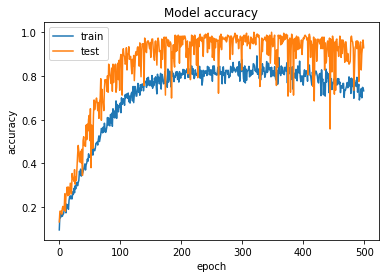

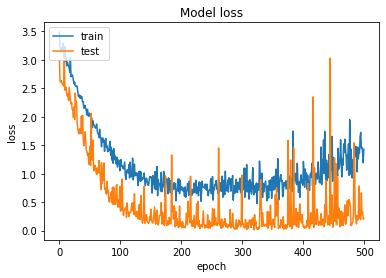

In [ ]:
def plot_train_history(history1):
    # Summarize history for accuracy
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

    # Summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

plot_train_history(history)

In [ ]:
model.save_weights("model.h5")

In [ ]:
def preparation(filepath):
  img_array = cv2.imread(filepath)
  new_array = cv2.resize(img_array, (IMGSIZE, IMGSIZE))
  return new_array.reshape(-1, IMGSIZE, IMGSIZE, 3)

In [ ]:
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

Saving 001.jpg to 001.jpg
Saving 002.jpg to 002.jpg
Saving 003.jpg to 003.jpg
Saving 004.jpg to 004.jpg
Saving 005.jpg to 005.jpg
Saving 006.jpg to 006.jpg
Saving 007.jpg to 007.jpg
Saving 008.jpg to 008.jpg
Saving 009.jpg to 009.jpg
Saving 010.jpg to 010.jpg
Saving 011.jpg to 011.jpg
Saving 012.jpg to 012.jpg
Saving 013.jpg to 013.jpg
Saving 014.jpg to 014.jpg
Saving 015.jpg to 015.jpg
Saving 016.jpg to 016.jpg
Saving 017.jpg to 017.jpg
Saving 018.jpg to 018.jpg
Saving 019.jpg to 019.jpg
Saving 020.jpg to 020.jpg
Saving 022.jpg to 022 (2).jpg
Saving 023.jpg to 023.jpg
Saving 024.jpg to 024.jpg
Saving 025.jpg to 025.jpg
Saving 027.jpg to 027.jpg
Saving 028.jpg to 028.jpg
Saving 029.jpg to 029.jpg
Saving 030.jpg to 030.jpg
Saving 032.jpg to 032.jpg
Saving 035.jpg to 035.jpg
Saving 036.jpg to 036.jpg
Saving 040.jpg to 040.jpg
Saving 045.jpg to 045.jpg
Saving 046.jpg to 046.jpg
Saving 049.jpg to 049.jpg
Saving 050.jpg to 050.jpg
Saving 052.jpg to 052.jpg
Saving 053.jpg to 053.jpg
Saving 0

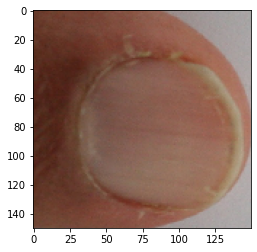

001.jpg
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]
(1, 150, 150, 3)


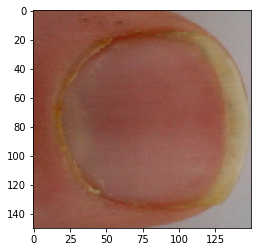

002.jpg
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]
(1, 150, 150, 3)


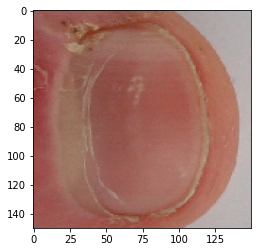

003.jpg
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]
(1, 150, 150, 3)


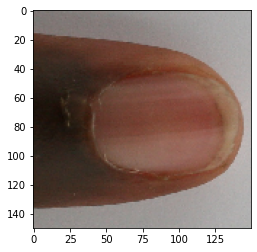

004.jpg
[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
(1, 150, 150, 3)


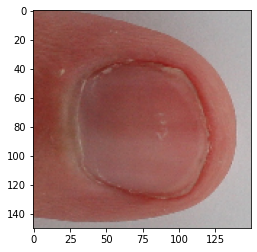

005.jpg
[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
(1, 150, 150, 3)


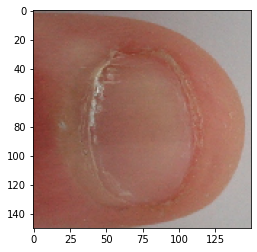

006.jpg
[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
(1, 150, 150, 3)


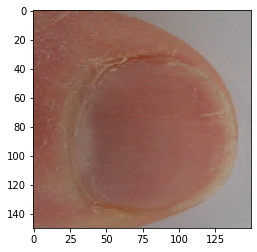

007.jpg
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]
(1, 150, 150, 3)


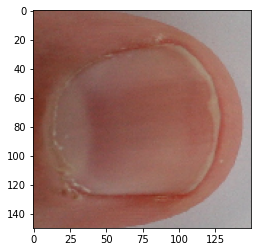

008.jpg
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]
(1, 150, 150, 3)


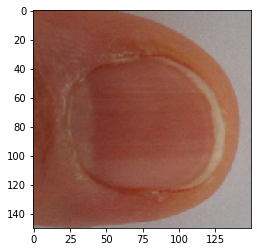

009.jpg
[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
(1, 150, 150, 3)


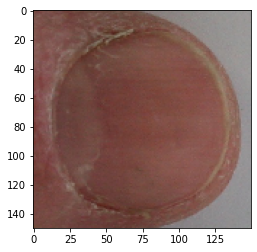

010.jpg
[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
(1, 150, 150, 3)


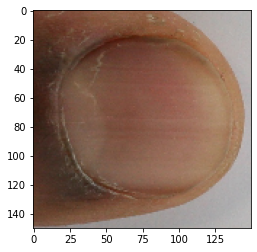

011.jpg
[[0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
  0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
  0.000000e+00 0.000000e+00 1.000000e+00 0.000000e+00 0.000000e+00
  0.000000e+00 3.561498e-12 0.000000e+00]]
(1, 150, 150, 3)


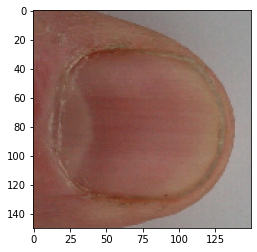

012.jpg
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]
(1, 150, 150, 3)


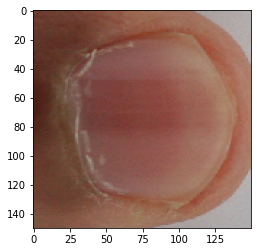

013.jpg
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]
(1, 150, 150, 3)


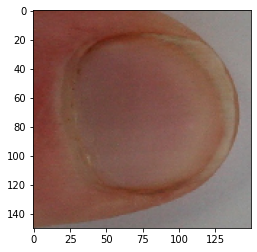

014.jpg
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]
(1, 150, 150, 3)


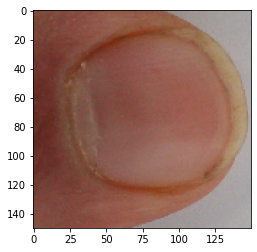

015.jpg
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]
(1, 150, 150, 3)


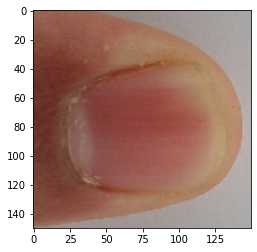

016.jpg
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]
(1, 150, 150, 3)


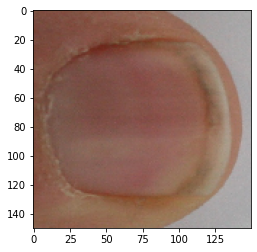

017.jpg
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]
(1, 150, 150, 3)


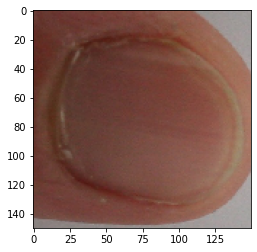

018.jpg
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]
(1, 150, 150, 3)


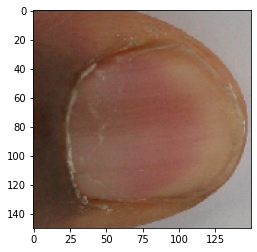

019.jpg
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]
(1, 150, 150, 3)


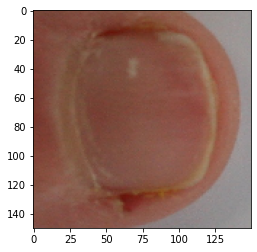

020.jpg
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]
(1, 150, 150, 3)


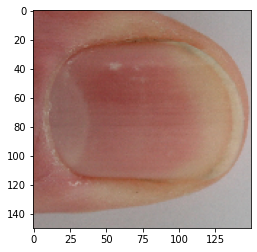

022.jpg
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]
(1, 150, 150, 3)


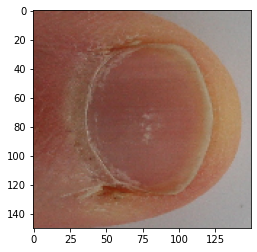

023.jpg
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]
(1, 150, 150, 3)


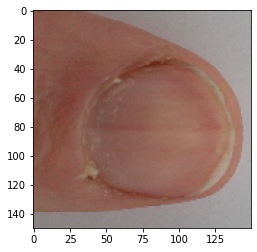

024.jpg
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]
(1, 150, 150, 3)


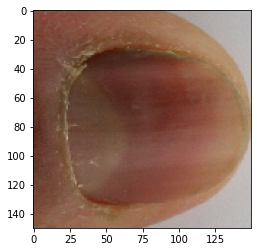

025.jpg
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]
(1, 150, 150, 3)


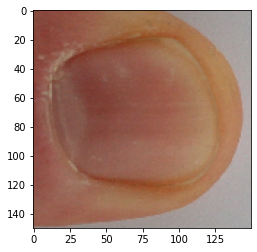

027.jpg
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]
(1, 150, 150, 3)


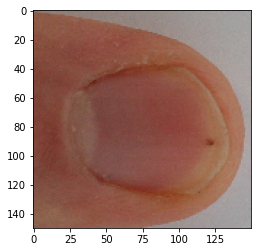

028.jpg
[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
(1, 150, 150, 3)


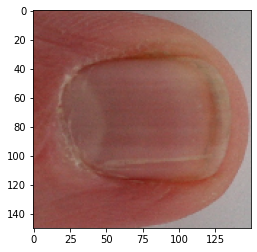

029.jpg
[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
(1, 150, 150, 3)


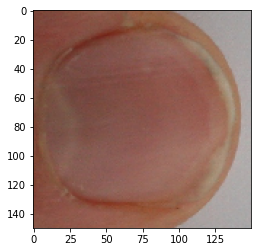

030.jpg
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]
(1, 150, 150, 3)


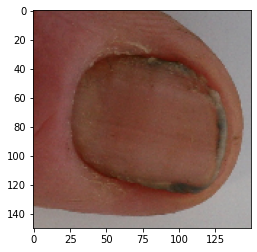

032.jpg
[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
(1, 150, 150, 3)


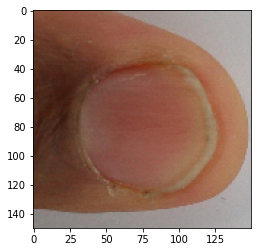

035.jpg
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]
(1, 150, 150, 3)


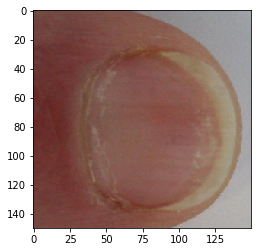

036.jpg
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]
(1, 150, 150, 3)


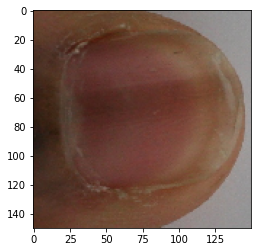

040.jpg
[[0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
  0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
  0.000000e+00 0.000000e+00 1.000000e+00 0.000000e+00 0.000000e+00
  0.000000e+00 5.280211e-17 0.000000e+00]]
(1, 150, 150, 3)


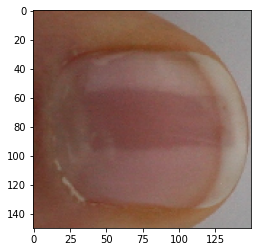

045.jpg
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]
(1, 150, 150, 3)


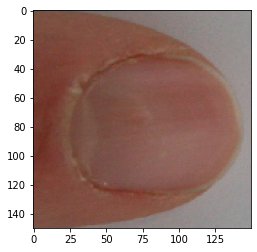

046.jpg
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]
(1, 150, 150, 3)


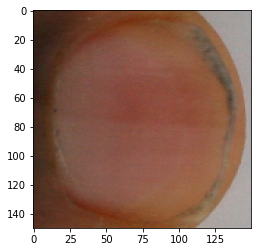

049.jpg
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]
(1, 150, 150, 3)


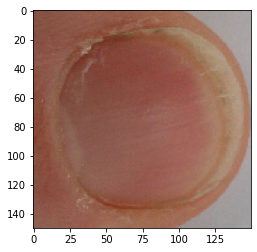

050.jpg
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]
(1, 150, 150, 3)


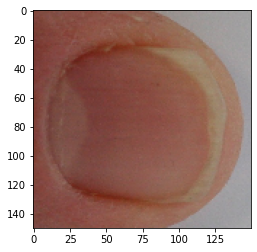

052.jpg
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]
(1, 150, 150, 3)


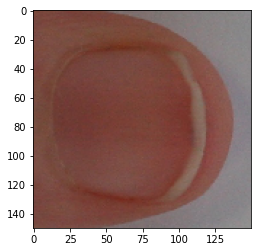

053.jpg
[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
(1, 150, 150, 3)


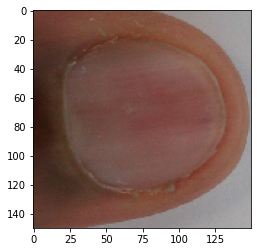

054.jpg
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]
(1, 150, 150, 3)


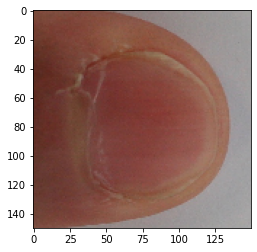

056.jpg
[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
(1, 150, 150, 3)


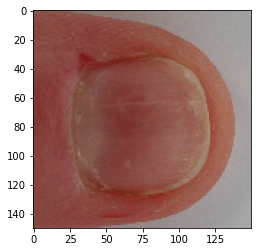

057.jpg
[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
(1, 150, 150, 3)


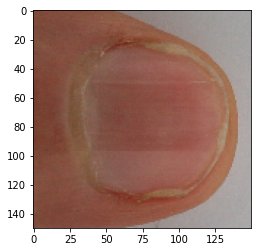

058.jpg
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]
(1, 150, 150, 3)


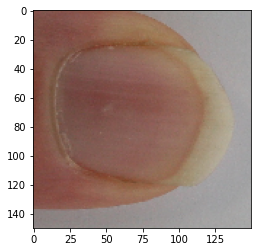

060.jpg
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]
(1, 150, 150, 3)


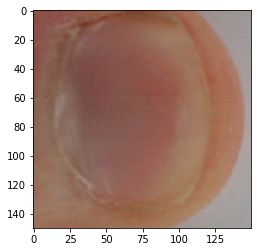

061.jpg
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]
(1, 150, 150, 3)


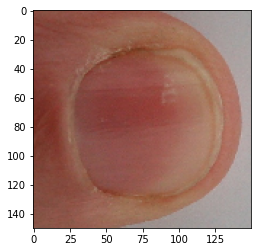

063.jpg
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]
(1, 150, 150, 3)


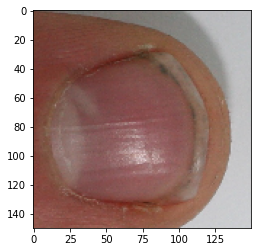

101.jpg
[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
(1, 150, 150, 3)


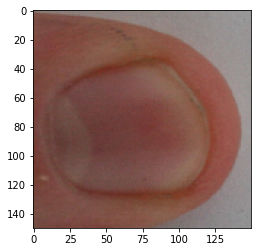

102.jpg
[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
(1, 150, 150, 3)


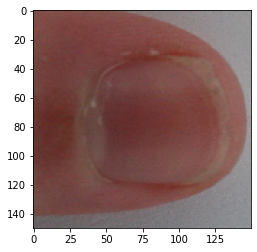

103.jpg
[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
(1, 150, 150, 3)


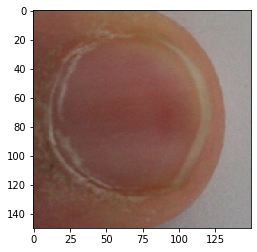

104.jpg
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]
(1, 150, 150, 3)


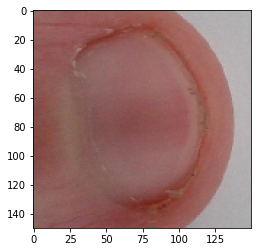

105.jpg
[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
(1, 150, 150, 3)


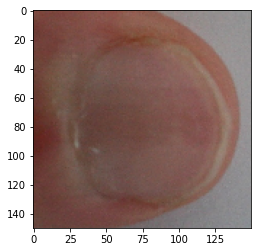

106.jpg
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]
(1, 150, 150, 3)


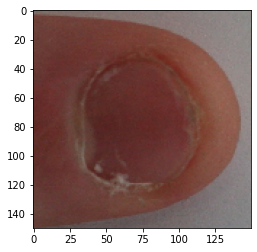

108.jpg
[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
(1, 150, 150, 3)


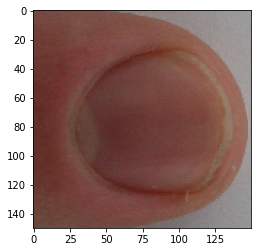

109.jpg
[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
(1, 150, 150, 3)


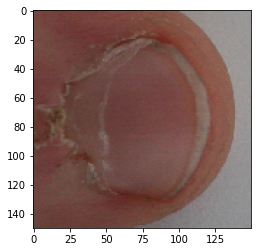

110.jpg
[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
(1, 150, 150, 3)


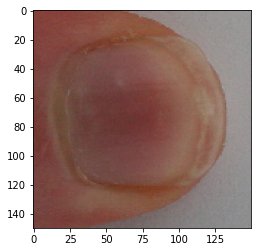

111.jpg
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]
(1, 150, 150, 3)


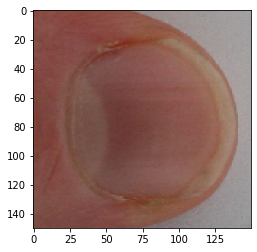

112.jpg
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]
(1, 150, 150, 3)


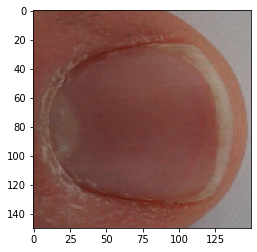

113.jpg
[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
(1, 150, 150, 3)


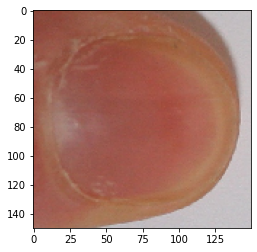

114.jpg
[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
(1, 150, 150, 3)


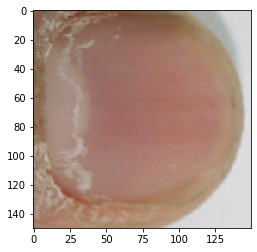

115.jpg
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]
(1, 150, 150, 3)


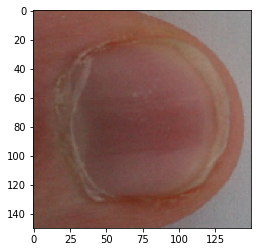

117.jpg
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]
(1, 150, 150, 3)


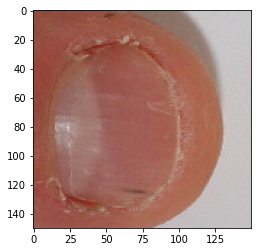

118.jpg
[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
(1, 150, 150, 3)


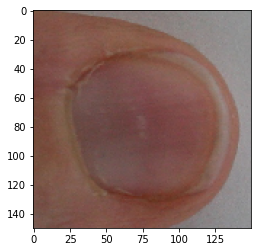

119.jpg
[[0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
  0.000000e+00 6.295281e-33 0.000000e+00 0.000000e+00 0.000000e+00
  0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
  0.000000e+00 1.000000e+00 0.000000e+00]]
(1, 150, 150, 3)


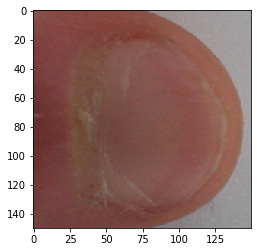

120.jpg
[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
(1, 150, 150, 3)


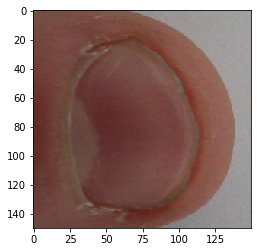

121.jpg
[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
(1, 150, 150, 3)


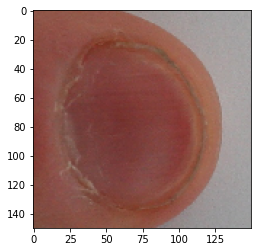

122.jpg
[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
(1, 150, 150, 3)


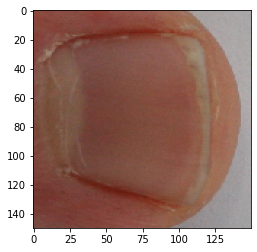

123.jpg
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]
(1, 150, 150, 3)


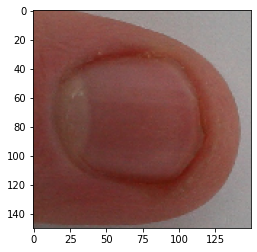

124.jpg
[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
(1, 150, 150, 3)


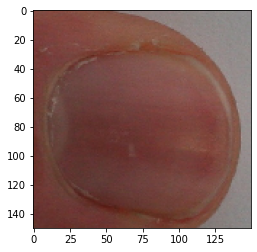

126.jpg
[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
(1, 150, 150, 3)


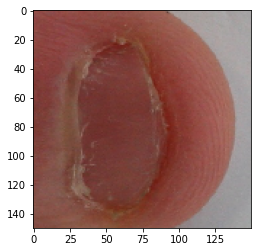

131.jpg
[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
(1, 150, 150, 3)


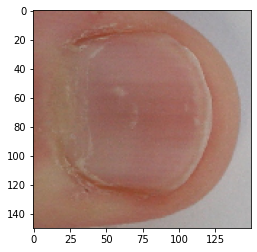

134.jpg
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]
(1, 150, 150, 3)


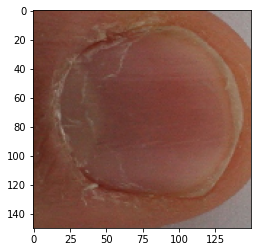

135.jpg
[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
(1, 150, 150, 3)


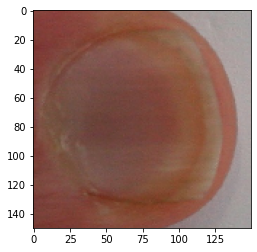

136.jpg
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]
(1, 150, 150, 3)


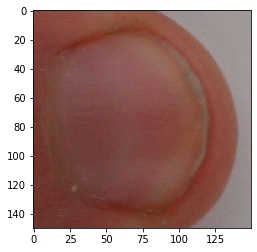

138.jpg
[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
(1, 150, 150, 3)


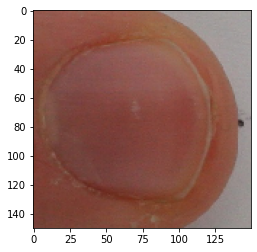

141.jpg
[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
(1, 150, 150, 3)


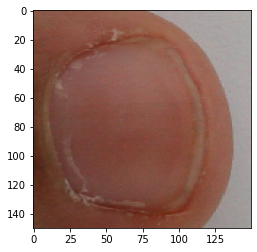

142.jpg
[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
(1, 150, 150, 3)


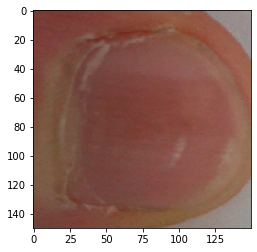

143.jpg
[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
(1, 150, 150, 3)


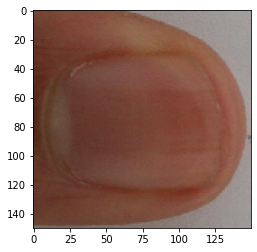

145.jpg
[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
(1, 150, 150, 3)


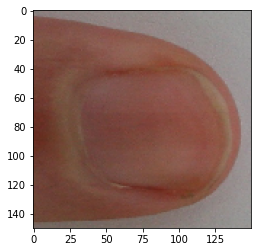

146.jpg
[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
(1, 150, 150, 3)


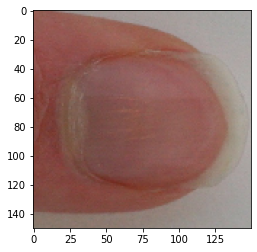

147.jpg
[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
(1, 150, 150, 3)


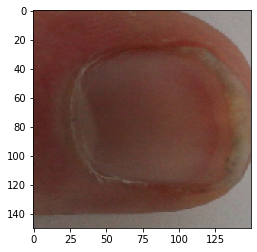

148.jpg
[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
(1, 150, 150, 3)


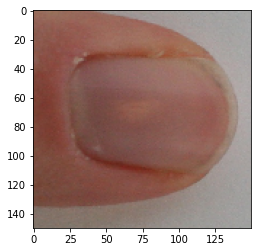

149.jpg
[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
(1, 150, 150, 3)


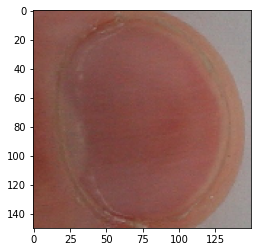

151.jpg
[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
(1, 150, 150, 3)


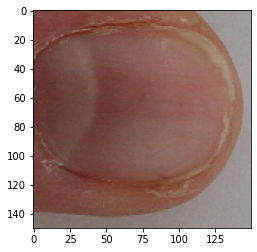

152.jpg
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]
(1, 150, 150, 3)


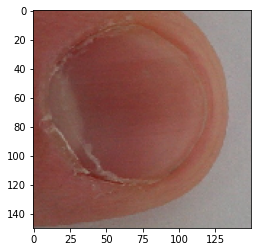

153.jpg
[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
(1, 150, 150, 3)


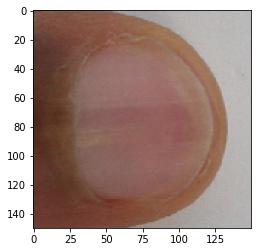

157.jpg
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]
(1, 150, 150, 3)


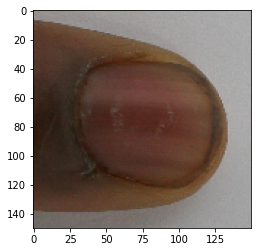

164.jpg
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
(1, 150, 150, 3)


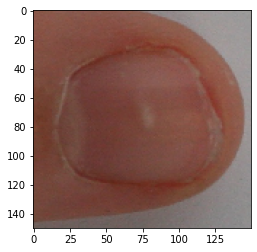

165.jpg
[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
(1, 150, 150, 3)


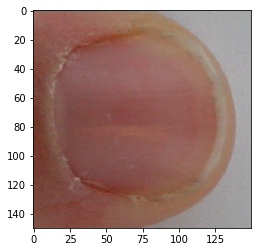

170.jpg
[[0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 1.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 1.3014176e-08 0.0000000e+00]]
(1, 150, 150, 3)


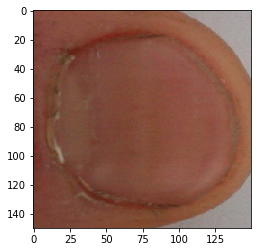

175.jpg
[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
(1, 150, 150, 3)


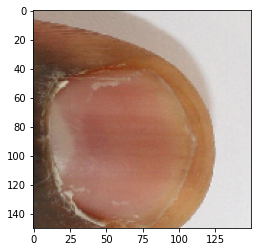

177.jpg
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]
(1, 150, 150, 3)


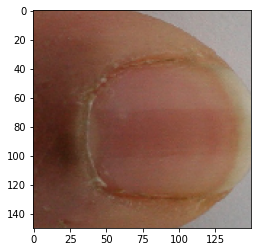

178.jpg
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]
(1, 150, 150, 3)


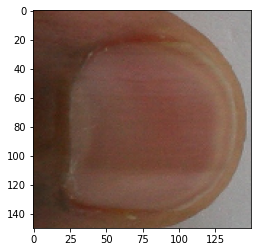

179.jpg
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]
(1, 150, 150, 3)


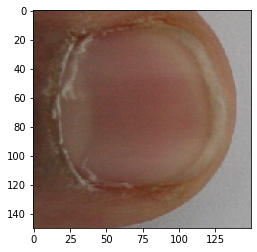

185.jpg
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]
(1, 150, 150, 3)


In [ ]:
for fn in uploaded.keys():
  predictions = model.predict([preparation(fn)])
  img = image.load_img(fn, target_size=(150, 150))
  img = np.array(img)
  img = img/255.
  xy = img
  xy = np.expand_dims(img, axis=0)
  
  imgplot = plt.imshow(img)
  plt.show()

  print(fn)
  print(predictions)
  print(xy.shape)
 


In [ ]:
class_names = CATEGORIES
test_label = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  color = 'blue'

  
  plt.xlabel("{} {:2.0f}%".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)


In [ ]:
def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(18), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')

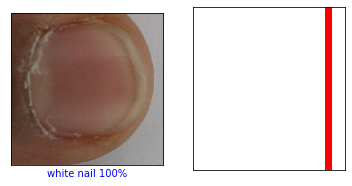

In [ ]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_label, xy)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_label)
plt.show()

In [ ]:
import tensorflow as tf

# Load the model.
new_model= tf.keras.models.load_model(filepath="nailss.h5")

# Convert the model.
converter = tf.lite.TFLiteConverter.from_keras_model(new_model)
tflite_model = converter.convert()

# Save the TF Lite model.
with tf.io.gfile.GFile('nailss.tflite', 'wb') as f:
  f.write(tflite_model)

# **Don't Run**

In [ ]:
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = (true_positives / (possible_positives + K.epsilon()))
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = (true_positives / (predicted_positives + K.epsilon()))
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))